# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1678306653430.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,03/07/2023,3986.37,--,4048.26,4050.00,3980.31
1,03/06/2023,4048.42,--,4055.15,4078.49,4044.61
2,03/03/2023,4045.64,--,3998.02,4048.29,3995.17
3,03/02/2023,3981.35,--,3938.68,3990.84,3928.16
4,03/01/2023,3951.39,--,3963.34,3971.73,3939.05
...,...,...,...,...,...,...
2536,03/14/2013,1563.23,--,1554.52,1563.32,1554.52
2537,03/13/2013,1554.52,--,1552.48,1556.39,1548.25
2538,03/12/2013,1552.48,--,1556.22,1556.77,1548.24
2539,03/11/2013,1556.22,--,1551.15,1556.27,1547.36


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2541.000000,2541.000000,2541.000000,2541.000000
mean,2778.992645,2760.452786,2775.438158,2744.202346
std,872.420393,909.150340,915.875558,901.843488
min,1541.610000,0.000000,0.000000,0.000000
25%,2063.110000,2060.300000,2071.460000,2046.040000
50%,2634.560000,2630.860000,2650.930000,2606.360000
75%,3360.470000,3360.500000,3379.970000,3336.250000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,2787.191820,2786.774148,2801.902408,2770.368756
std,872.347529,872.386358,879.005040,865.193905
min,1541.610000,1541.610000,1552.480000,1536.030000
25%,2065.890000,2065.040000,2075.140000,2053.130000
50%,2641.890000,2643.890000,2660.950000,2622.450000
75%,3373.230000,3369.040000,3387.590000,3354.690000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2540
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   object 
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [5]:
df.shape

(2517, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

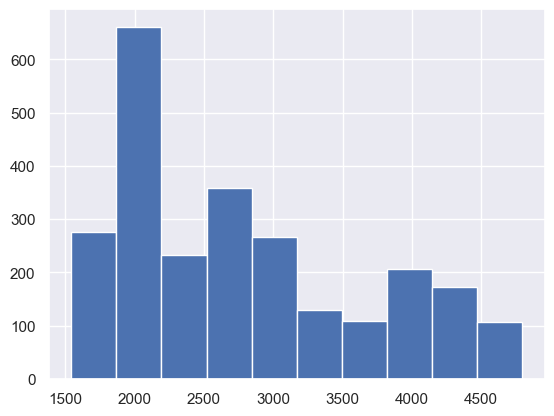

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3986.37

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2787.1918196265483

In [10]:
close_sd = df['Close/Last'].std()
close_sd

872.3475288788995

In [11]:
sigma1 = close_mean + close_sd
sigma1

3659.539348505448

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4531.886877384348

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

4968.060641823797

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-03-08 to 2023-03-07')

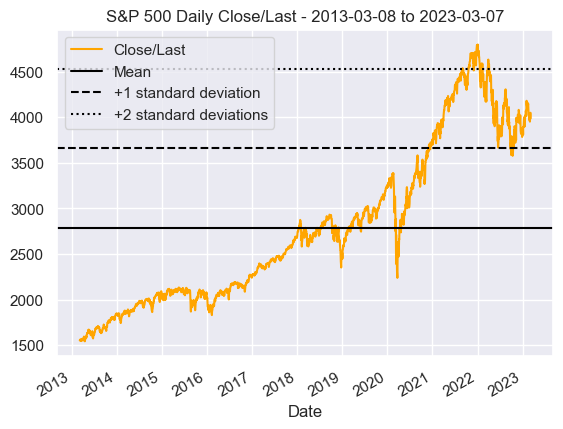

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-03-08 to 2023-03-07')

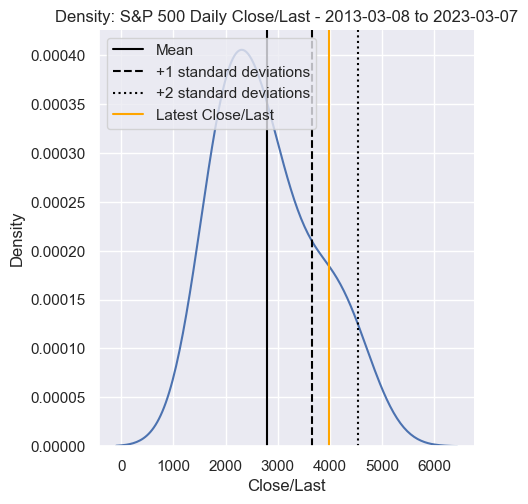

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.3746564765473452

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results